# Pandas Practice Exercises

This notebook contains 40+ exercises to practice your Pandas skills. The exercises start from the basics and gradually increase in difficulty.

## Datasets Used
We will use a few common datasets available online. You can load them directly using the URLs provided in the exercises.
1. **Chipotle**: `https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv`
2. **Drinks**: `https://raw.githubusercontent.com/justmarkham/DAT8/master/data/drinks.csv`
3. **Titanic**: `https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv`

---

## Section 1: Getting Started & Basic Data Structures


In [139]:
# 1. Import pandas as pd and numpy as np
import pandas as pd
import numpy as np

In [140]:
# 2. Print the version of pandas that has been imported.
pd.__version__

'2.2.2'

In [141]:
# 3. Create a pandas Series from the following list:
data = [10, 20, 30, 40, 50]
# Your code here
my_series = pd.Series([10, 20, 30, 40, 50])
my_series

0    10
1    20
2    30
3    40
4    50
dtype: int64

In [142]:
# 4. Create a DataFrame from the following dictionary:
data_dict = {
    'name': ['Alice', 'Bob', 'Charlie', 'David'],
    'age': [25, 30, 35, 40],
    'city': ['New York', 'Los Angeles', 'Chicago', 'Houston']
}
# Your code here
my_df = pd.DataFrame(data_dict)
my_df

,name,age,city
0,Alice,25,New York
1,Bob,30,Los Angeles
2,Charlie,35,Chicago
3,David,40,Houston


In [143]:
# 5. Set the 'name' column as the index of the DataFrame created in Q4.
my_df.set_index('name')

,age,city
name,,
Alice,25,New York
Bob,30,Los Angeles
Charlie,35,Chicago
David,40,Houston


---
## Section 2: Loading Data & Basic Exploration
For this section, we will use the **Chipotle** dataset.
URL: `https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv`
*Note: This file is tab-separated.*


In [144]:
# 6. Load the dataset into a variable called `chipo`.
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
# Your code here
chipo = pd.read_csv(url, sep='\t')

In [145]:
# 7. Show the first 10 entries of the dataframe.
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [146]:
# 8. What is the number of observations (rows) and columns in the dataset?
chipo.shape

(4622, 5)

In [147]:
# 9. Print the name of all the columns.
chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [148]:
# 10. How is the dataset indexed?
chipo.index

RangeIndex(start=0, stop=4622, step=1)

---
## Section 3: Data Cleaning & Manipulation
Continue using the `chipo` dataframe.


In [149]:
# 11. Check the data type of each column.
chipo.dtypes

order_id               int64
quantity               int64
item_name             object
choice_description    object
item_price            object
dtype: object

In [150]:
# 12. The 'item_price' column is currently an object (string) because of the '$' sign.
# Clean this column: remove the '$' and convert it to a float.
chipo['item_price'] = chipo['item_price'].str.strip('$').astype(float)
chipo

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75


In [151]:
# 13. Are there any missing values in the dataset? Check for nulls.
chipo.isnull().sum()

order_id                 0
quantity                 0
item_name                0
choice_description    1246
item_price               0
dtype: int64

In [152]:
# 14. Drop any duplicate rows, if they exist.
chipo.drop_duplicates()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75


In [153]:
# 15. Create a new column 'revenue' which is the product of 'quantity' and 'item_price'.
chipo['revenue'] = chipo['quantity'] * chipo['item_price']
chipo

,order_id,quantity,item_name,choice_description,item_price,revenue
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39,2.39
1,1,1,Izze,[Clementine],3.39,3.39
2,1,1,Nantucket Nectar,[Apple],3.39,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,33.96
...,...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75,11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75,11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25,11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75,8.75


---
## Section 4: Filtering & Sorting


In [154]:
# 16. Sort the dataframe by 'item_price' in descending order.
chipo.sort_values(['item_price'], ascending=False)

,order_id,quantity,item_name,choice_description,item_price,revenue
3598,1443,15,Chips and Fresh Tomato Salsa,NaN,44.25,663.75
3480,1398,3,Carnitas Bowl,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",35.25,105.75
1254,511,4,Chicken Burrito,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",35.00,140.00
3602,1443,4,Chicken Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",35.00,140.00
3601,1443,3,Veggie Burrito,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",33.75,101.25
...,...,...,...,...,...,...
3936,1578,1,Canned Soda,[Diet Dr. Pepper],1.09,1.09
2922,1162,1,Bottled Water,NaN,1.09,1.09
1396,567,1,Canned Soda,[Coca Cola],1.09,1.09
2562,1014,1,Canned Soda,[Coca Cola],1.09,1.09


In [155]:
# 17. How many items cost more than $10.00?
(chipo['item_price']>10.00).sum()

1130

In [156]:
# 18. What is the price of each item? 
# (Hint: print a dataframe with only two columns: item_name and item_price, drop duplicates)
chipo.drop_duplicates(['item_name'], ignore_index=True)[['item_name', 'item_price']]

,item_name,item_price
0,Chips and Fresh Tomato Salsa,2.39
1,Izze,3.39
2,Nantucket Nectar,3.39
3,Chips and Tomatillo-Green Chili Salsa,2.39
4,Chicken Bowl,16.98
5,Side of Chips,1.69
6,Steak Burrito,11.75
7,Steak Soft Tacos,9.25
8,Chips and Guacamole,4.45
9,Chicken Crispy Tacos,8.75


In [157]:
# 19. Select only the items where the name is 'Chicken Bowl'.
chipo[chipo['item_name']=='Chicken Bowl']

,order_id,quantity,item_name,choice_description,item_price,revenue
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,33.96
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",10.98,10.98
13,7,1,Chicken Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25,11.25
19,10,1,Chicken Bowl,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",8.75,8.75
26,13,1,Chicken Bowl,"[Roasted Chili Corn Salsa (Medium), [Pinto Bea...",8.49,8.49
...,...,...,...,...,...,...
4590,1825,1,Chicken Bowl,"[Roasted Chili Corn Salsa, [Rice, Black Beans,...",11.25,11.25
4591,1825,1,Chicken Bowl,"[Tomatillo Red Chili Salsa, [Rice, Black Beans...",8.75,8.75
4595,1826,1,Chicken Bowl,"[Tomatillo Green Chili Salsa, [Rice, Black Bea...",8.75,8.75
4599,1827,1,Chicken Bowl,"[Roasted Chili Corn Salsa, [Cheese, Lettuce]]",8.75,8.75


In [158]:
# 20. Select items where the name is 'Chicken Bowl' AND the quantity is greater than 1.
chipo[(chipo['item_name']=='Chicken Bowl') & (chipo['quantity']>1)]

,order_id,quantity,item_name,choice_description,item_price,revenue
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,33.96
154,70,2,Chicken Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",17.50,35.00
282,124,2,Chicken Bowl,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",17.50,35.00
409,178,3,Chicken Bowl,"[[Fresh Tomato Salsa (Mild), Tomatillo-Green C...",32.94,98.82
415,181,2,Chicken Bowl,[Tomatillo Red Chili Salsa],17.50,35.00
654,271,2,Chicken Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",17.50,35.00
976,401,2,Chicken Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",17.50,35.00
1017,418,2,Chicken Bowl,"[Fresh Tomato Salsa, [Rice, Cheese, Black Beans]]",17.50,35.00
1106,457,2,Chicken Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",17.50,35.00
1429,578,2,Chicken Bowl,"[Fresh Tomato Salsa, [Rice, Sour Cream, Guacam...",22.50,45.00


---
## Section 5: Aggregation & Grouping
For this section, we will use the **Drinks** dataset.
URL: `https://raw.githubusercontent.com/justmarkham/DAT8/master/data/drinks.csv`


In [159]:
# 21. Load the drinks dataset into a variable called `drinks`.
url_drinks = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/drinks.csv'
# Your code here
drinks = pd.read_csv(url_drinks)
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [160]:
# 22. Which continent drinks more beer on average?
drinks.groupby('continent')['beer_servings'].mean().idxmax()

'EU'

In [161]:
# 23. For each continent, print the statistics for wine consumption.
drinks.groupby('continent')['wine_servings'].describe()

,count,mean,std,min,25%,50%,75%,max
continent,,,,,,,,
AF,53.0,16.264151,38.846419,0.0,1.0,2.0,13.00,233.0
AS,44.0,9.068182,21.667034,0.0,0.0,1.0,8.00,123.0
EU,45.0,142.222222,97.421738,0.0,59.0,128.0,195.00,370.0
OC,16.0,35.625000,64.555790,0.0,1.0,8.5,23.25,212.0
SA,12.0,62.416667,88.620189,1.0,3.0,12.0,98.50,221.0


In [162]:
# 24. Print the mean alcohol consumption per continent for every column.
drinks.groupby('continent').mean(numeric_only=True)

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
AF,61.471698,16.339623,16.264151,3.007547
AS,37.045455,60.840909,9.068182,2.170455
EU,193.777778,132.555556,142.222222,8.617778
OC,89.687500,58.437500,35.625000,3.381250
SA,175.083333,114.750000,62.416667,6.308333


In [163]:
# 25. Print the median alcohol consumption per continent for every column.
drinks.groupby('continent').median(numeric_only=True)

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
AF,32.0,3.0,2.0,2.30
AS,17.5,16.0,1.0,1.20
EU,219.0,122.0,128.0,10.00
OC,52.5,37.0,8.5,1.75
SA,162.5,108.5,12.0,6.85


---
## Section 6: Apply & Advanced Selection
Back to the `chipo` dataset


In [164]:
# 26. Create a function that returns "High" if a price is > 10 and "Low" otherwise.
# Apply this function to the 'item_price' column of `chipo` and create a new column 'price_level'.
def level(num):
    if num>10:
        return "High"
    else:
        return "Low"

chipo['price_level'] = chipo['item_price'].apply(level)
chipo

,order_id,quantity,item_name,choice_description,item_price,revenue,price_level
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39,2.39,Low
1,1,1,Izze,[Clementine],3.39,3.39,Low
2,1,1,Nantucket Nectar,[Apple],3.39,3.39,Low
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39,2.39,Low
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,33.96,High
...,...,...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75,11.75,High
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75,11.75,High
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25,11.25,High
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75,8.75,Low


In [182]:
# 27. Use the `apply` method to capitalize all strings in the 'item_name' column.
chipo['item_name'].apply(str.capitalize)

0                Chips and fresh tomato salsa
1                                        Izze
2                            Nantucket nectar
3       Chips and tomatillo-green chili salsa
4                                Chicken bowl
                        ...                  
4617                            Steak burrito
4618                            Steak burrito
4619                       Chicken salad bowl
4620                       Chicken salad bowl
4621                       Chicken salad bowl
Name: item_name, Length: 4622, dtype: object

In [166]:
# 28. Select only the rows from index 10 to 20 (inclusive) and columns 1 to 3.
chipo.iloc[10:21, 0:3]

,order_id,quantity,item_name
10,5,1,Chips and Guacamole
11,6,1,Chicken Crispy Tacos
12,6,1,Chicken Soft Tacos
13,7,1,Chicken Bowl
14,7,1,Chips and Guacamole
15,8,1,Chips and Tomatillo-Green Chili Salsa
16,8,1,Chicken Burrito
17,9,1,Chicken Burrito
18,9,2,Canned Soda
19,10,1,Chicken Bowl


---
## Section 7: Merging & Joining


In [167]:
# 29. Create two dataframes:
df1 = pd.DataFrame({'ID': [1, 2, 3], 'Name': ['Alice', 'Bob', 'Charlie']})
df2 = pd.DataFrame({'ID': [2, 3, 4], 'Score': [85, 90, 95]})

# Merge them on 'ID' using an inner join.
df1.merge(df2, on='ID', how='inner')

,ID,Name,Score
0,2,Bob,85
1,3,Charlie,90


In [168]:
# 30. Merge them on 'ID' using an outer join.
df1.merge(df2, on='ID', how='outer')

,ID,Name,Score
0,1,Alice,NaN
1,2,Bob,85.0
2,3,Charlie,90.0
3,4,NaN,95.0


In [169]:
# 31. Merge them on 'ID' using a left join (keep all from df1).
df1.merge(df2, on='ID', how='left')

,ID,Name,Score
0,1,Alice,NaN
1,2,Bob,85.0
2,3,Charlie,90.0


---
## Section 8: Time Series
For this section, let's generate some time series data.


In [170]:
# 32. Create a date range from '2023-01-01' to '2023-01-10'.


In [171]:
# 33. Create a DataFrame with this date range as the index and a column 'Sales' with random values.


In [172]:
# 34. Resample the data to calculate the 3-day sum of sales.


In [173]:
# 35. Shift the 'Sales' column by 1 day (create a lag column).


---
## Section 9: Titanic Dataset - Mixed Practice
URL: `https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv`


In [174]:
# 36. Load the Titanic dataset.
url_titanic = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
# Your code here
titanic = pd.read_csv(url_titanic)
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [175]:
# 37. How many passengers survived? (Survived=1)
(titanic['Survived'] == 1).sum()

342

In [176]:
# 38. What is the average age of passengers?
titanic['Age'].mean().round(0)

30.0

In [177]:
# 39. Group by 'Pclass' and calculate the survival rate (mean of 'Survived').
titanic.groupby('Pclass').agg(survival_rate=('Survived', 'mean'))

,survival_rate
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [178]:
# 40. Fill missing values in the 'Age' column with the median age.
titanic['Age'].fillna(titanic['Age'].median())

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [179]:
# 41. Create a pivot table showing the average age by 'Sex' and 'Pclass'.
titanic.pivot_table(index='Sex', columns='Pclass', values='Age', aggfunc='mean')

Pclass,1,2,3
Sex,,,
female,34.611765,28.722973,21.750000
male,41.281386,30.740707,26.507589


---
## Section 10: Visualization (Optional)
Requires matplotlib/seaborn


<Axes: xlabel='Age', ylabel='Count'>

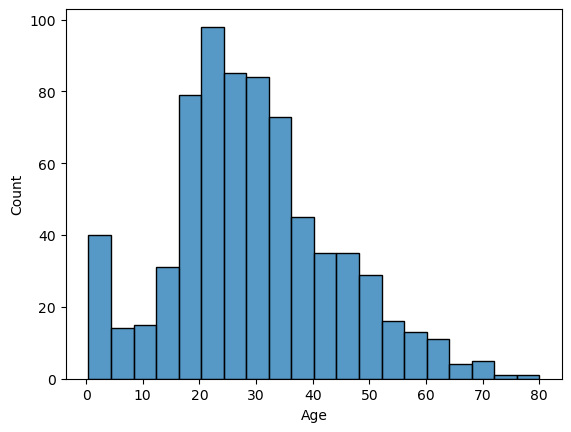

In [180]:
# 42. Plot a histogram of the 'Age' column from the Titanic dataset.
import seaborn as sns

sns.histplot(data=titanic, x='Age')

<Axes: xlabel='Pclass', ylabel='Fare'>

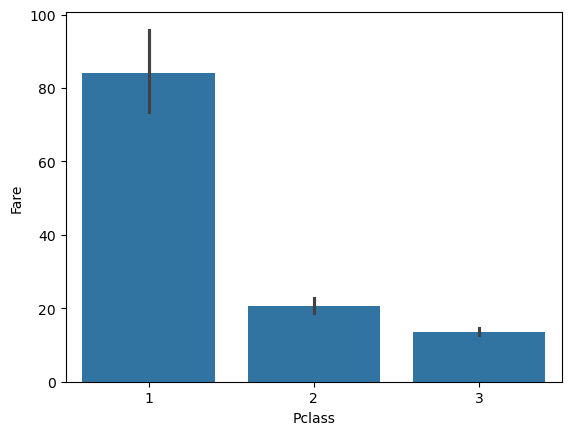

In [181]:
# 43. Plot a bar chart of the average fare by Pclass.
sns.barplot(data=titanic, x='Pclass', y='Fare')

---
## Great Job!
You've covered the basics of Pandas including creating objects, reading data, cleaning, filtering, grouping, merging, and time series.
